### LDA, QDA, NB and KNN

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Import Default dataset

In [4]:
df = pd.read_csv('/content/Smarket.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


2. Examine different models

In [19]:
import patsy
y,x = patsy.dmatrices('Direction ~ Lag1 + Lag2 + Volume', data=df, return_type='dataframe')

x.head()
y.head()

,Intercept,Lag1,Lag2,Volume
0,1.0,0.381,-0.192,1.1913
1,1.0,0.959,0.381,1.2965
2,1.0,1.032,0.959,1.4112
3,1.0,-0.623,1.032,1.2760
4,1.0,0.614,-0.623,1.2057


,Direction[Down],Direction[Up]
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [20]:
import statsmodels.api as sm
model = sm.Logit(y['Direction[Up]'], x)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.691082
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1246
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                0.002004
Time:                        21:21:24   Log-Likelihood:                -863.85
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.3248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1206      0.240     -0.502      0.616      -0.591       0.350
Lag1          -0.0733      0.050     -1.460      0.144      -0.172       0.025
Lag2          -0.0428      0.050     -0.855      0.393      -0.141       0.055
Volume         0.1318      0.158      0.835      0.404      -0.178       0.441
==============================================================================
"""

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

x_with_const = sm.add_constant(x)
predictions = result.predict(x_with_const)

# Convert probabilities to binary predictions (Up or Down)
predicted_direction = ['Up' if p > 0.5 else 'Down' for p in predictions]

# Create a new column in the DataFrame to store the predicted values.
df['Predicted'] = predicted_direction

# Calculate the accuracy of the model
accuracy = accuracy_score(df['Direction'], df['Predicted'])

print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(df['Direction'], df['Predicted'], labels=['Up', 'Down'])

print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5312
Confusion Matrix:
[[517 131]
 [455 147]]
Cross-validation scores: [0.512 0.524 0.5   0.548 0.536]
Average cross-validation score: 0.524


In [21]:
# Fit LDA, QDA and NB models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB

x = df[['Lag1','Lag2','Volume']]
y = df['Direction']

model_lda = LDA()
model_qda = QDA()
model_nb = GaussianNB()

model_lda.fit(x, y)
model_qda.fit(x, y)
model_nb.fit(x, y)

LinearDiscriminantAnalysis()

QuadraticDiscriminantAnalysis()

GaussianNB()

In [25]:
# Fit a KNN model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# Make predictions for all models
pred_lda = model_lda.predict(x)
pred_qda = model_qda.predict(x)
pred_nb = model_nb.predict(x)
pred_knn = model_knn.predict(x)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate LDA
print("LDA:")
print(accuracy_score(y, pred_lda))
print(confusion_matrix(y, pred_lda))
print(classification_report(y, pred_lda))

# Evaluate QDA
print("\nQDA:")
print(accuracy_score(y, pred_qda))
print(confusion_matrix(y, pred_qda))
print(classification_report(y, pred_qda))

# Evaluate NB
print("\nNB:")
print(accuracy_score(y, pred_nb))
print(confusion_matrix(y, pred_nb))
print(classification_report(y, pred_nb))

# Evaluate KNN
print("\nKNN:")
print(accuracy_score(y, pred_knn))
print(confusion_matrix(y, pred_knn))
print(classification_report(y, pred_knn))


LDA:
0.5328
[[147 455]
 [129 519]]
              precision    recall  f1-score   support

        Down       0.53      0.24      0.33       602
          Up       0.53      0.80      0.64       648

    accuracy                           0.53      1250
   macro avg       0.53      0.52      0.49      1250
weighted avg       0.53      0.53      0.49      1250


QDA:
0.5152
[[125 477]
 [129 519]]
              precision    recall  f1-score   support

        Down       0.49      0.21      0.29       602
          Up       0.52      0.80      0.63       648

    accuracy                           0.52      1250
   macro avg       0.51      0.50      0.46      1250
weighted avg       0.51      0.52      0.47      1250


NB:
0.5248
[[124 478]
 [116 532]]
              precision    recall  f1-score   support

        Down       0.52      0.21      0.29       602
          Up       0.53      0.82      0.64       648

    accuracy                           0.52      1250
   macro avg       0.5

<Figure size 1000x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curves for all models')

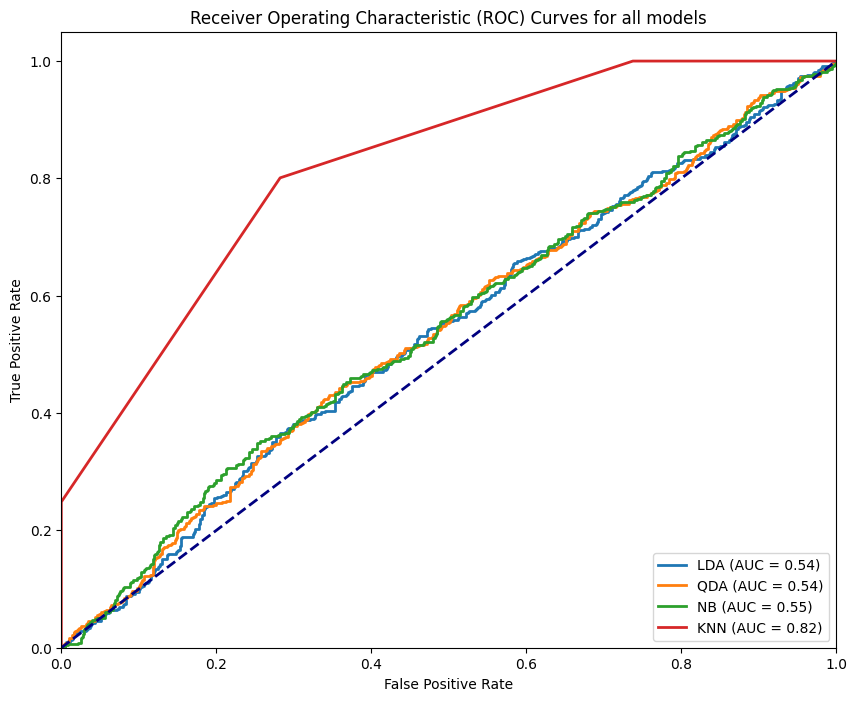

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each model
models = {
    'LDA': (y, model_lda.predict_proba(x)[:, 1]),
    'QDA': (y, model_qda.predict_proba(x)[:, 1]),
    'NB': (y, model_nb.predict_proba(x)[:, 1]),
    'KNN': (y, model_knn.predict_proba(x)[:, 1])
}

plt.figure(figsize=(10, 8))
for model_name, (true_y, predicted_probs) in models.items():
    fpr, tpr, thresholds = roc_curve(true_y, predicted_probs, pos_label='Up')
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for all models')
plt.legend(loc="lower right")
plt.show()